### predict  category of  financail


Predicting the financial classification of people with a series of random and relatively logical data


algoritm=KNN


 add required libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

#### create  random data 

parameters=Savings,Income,Expenses,Debt,Assets

Financial Category = (Income + Savings + Assets) - (Expenses + Debt)

In [44]:

# Set a seed for reproducibility
np.random.seed(123)

# Generate random data for the parameters
savings = np.random.randint(0, 50001, 1000)
income = np.random.randint(20000, 150001, 1000)
expenses = np.random.randint(10000, 100001, 1000)
debt = np.random.randint(0, 150001, 1000)
assets = np.random.randint(100000, 500001, 1000)

# Create a Pandas DataFrame from the random data
data = {'Savings': savings,
        'Income': income,
        'Expenses': expenses,
        'Debt': debt,
        'Assets': assets}
df = pd.DataFrame(data)

# Define the formula to calculate Financial Category
def calc_financial_category(row):
    return row['Income'] + row['Savings'] + row['Assets'] - row['Expenses'] - row['Debt']

# Apply the formula to each row to calculate Financial Category
df['Financial Category'] = df.apply(calc_financial_category, axis=1)

# Map Financial Category to a range of 1 to 7
df['Financial Category'] = pd.cut(df['Financial Category'], bins=[-np.inf, 10000, 50000, 100000, 200000,400000,np.inf], labels=[1, 2, 3, 4,5,6])

# show the resulting DataFrame

df

,Savings,Income,Expenses,Debt,Assets,Financial Category
0,15725,136017,15908,133424,106535,4
1,28030,72678,51190,53430,314189,5
2,17730,27915,39757,31038,235296,5
3,15377,29124,93991,52676,215777,4
4,7763,84231,92606,107554,437501,5
...,...,...,...,...,...,...
995,39973,66753,19553,97870,446717,6
996,1359,136869,15972,57183,306434,5
997,32543,134613,79045,87602,317923,5
998,28416,81954,27852,114998,153776,4


In [45]:
df['Financial Category'].value_counts()

5    480
4    227
6    206
3     60
2     17
1     10
Name: Financial Category, dtype: int64

149853

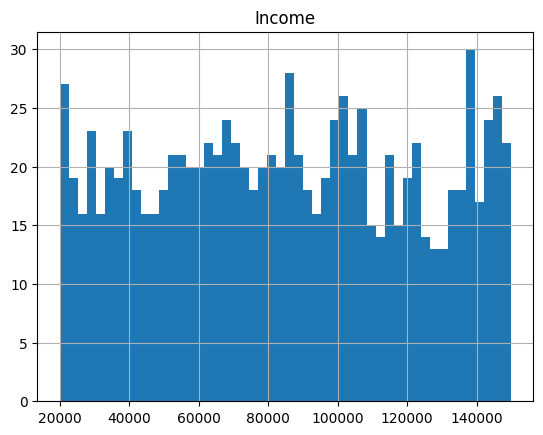

In [46]:
df.hist(column='Income', bins=50)
df["Income"].max()

In [47]:
df.columns

Index(['Savings', 'Income', 'Expenses', 'Debt', 'Assets',
       'Financial Category'],
      dtype='object')

In [48]:
X = df[['Savings', 'Income','Expenses', 'Debt', 'Assets']] .values.astype(float)

In [49]:
y = df['Financial Category'].values

## Normalize Data

In [50]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.58746582,  1.35975562, -1.5317012 ,  1.27665324, -1.64431944],
       [ 0.25700347, -0.32525812, -0.17139979, -0.55406631,  0.11333818],
       [-0.44986639, -1.51609267, -0.61220037, -1.06652315, -0.55444035],
       [-0.61134841, -1.48392953,  1.4787975 , -0.57132213, -0.71965614],
       [-1.13388308, -0.01791251,  1.42539867,  0.6845999 ,  1.157095  ]])

### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


<h3>K nearest neighbor (KNN)</h3>


#### Import library


In [52]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [53]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

### Predicting

In [72]:
yhat = neigh.predict(X_test)

print(yhat[0:5],
y_test[0:5])



[5 5 6 4 5] [5, 4, 6, 4, 6]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


### Accuracy evaluation

k=10

In [55]:
print(k)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

10
Train set Accuracy:  0.83
Test set Accuracy:  0.755


###  recive  best  k

way=1

In [56]:
a={}
for n in range(1,30):
    
    #Train Model and Predict  
    model_neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predicted = model_neigh.predict(X_test)
    
    

    index=0
    true_result=0
    for num2 in y_predicted:
            if num2==y_test[index]:
                true_result+=1
            index+=1
    a[n]=true_result
    
for key ,  value in a.items():
    if value==max(a.values()):
        print("kn:",key,", true value:",value,"of  200")

kn: 21 , true value: 161 of  200
kn: 22 , true value: 161 of  200


way=2

In [57]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.725, 0.69 , 0.73 , 0.72 , 0.74 , 0.73 , 0.755, 0.77 , 0.755,
       0.755, 0.765, 0.775, 0.785, 0.77 , 0.775, 0.765, 0.77 , 0.775,
       0.775, 0.795, 0.805, 0.805, 0.8  , 0.79 , 0.8  , 0.785, 0.8  ,
       0.8  , 0.795])

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.805 with k= 21


### desssion tree

create model

In [67]:
from sklearn.tree import  DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

see predicted  data

In [65]:
predTree = drugTree.predict(X_test)


print (predTree [0:5])
print (y_test [0:5])


[4 4 5 4 6]
[5, 4, 6, 4, 6]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


evaluation DecisionTrees moedl 

In [69]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.74
